<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/python_workshop_2024_02_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Connect to Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read marijuana csv file

In [23]:
drive_url = '/content/drive/MyDrive/_CAASI/Grief to Action - PDAP/'

In [24]:
df = pd.read_csv(drive_url + 'marijuana.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    13169 non-null  int64  
 1   PK                     13169 non-null  int64  
 2   CCR                    13169 non-null  int64  
 3   AGE                    13119 non-null  float64
 4   GENDER                 13169 non-null  object 
 5   RACE                   13169 non-null  object 
 6   ARRESTTIME             13169 non-null  object 
 7   ARRESTLOCATION         13169 non-null  object 
 8   OFFENSES               13169 non-null  object 
 9   INCIDENTLOCATION       13169 non-null  object 
 10  INCIDENTNEIGHBORHOOD   12864 non-null  object 
 11  INCIDENTZONE           13156 non-null  object 
 12  INCIDENTTRACT          12872 non-null  float64
 13  COUNCIL_DISTRICT       11473 non-null  float64
 14  PUBLIC_WORKS_DIVISION  11473 non-null  float64
 15  X 

In [26]:
df.ARRESTTIME.head()

0    2016-08-22T22:09:00
1    2016-08-27T02:04:00
2    2016-08-29T11:20:00
3    2016-08-13T17:08:00
4    2016-08-11T18:12:00
Name: ARRESTTIME, dtype: object

In [27]:
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])

In [28]:
df['ARRESTYEAR'] = [x.year for x in df['ARRESTTIME']]

In [29]:
df.tail()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,mari_flag,ARRESTYEAR
13164,86912,2063134,23155492,57.0,M,B,2023-09-30 09:00:00,"5th AV & Vine ST Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"5th AV & Vine ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.984089,40.438506,1,2023
13165,86947,2063140,23148791,53.0,F,B,2023-09-18 18:13:00,"600 Block Smithfield ST Pittsburgh, PA 15222",13(a)(16) Possession of Controlled Substance /...,"600 Block Smithfield ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.997409,40.441533,1,2023
13166,86975,2063182,23153260,31.0,M,B,2023-09-26 15:46:00,"400 Block Foreland ST Pittsburgh, PA 15212",13(a)(32) Paraphernalia - Use or Possession / ...,"400 Block Foreland ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001905,40.454087,1,2023
13167,86978,2063185,23153340,70.0,M,B,2023-09-26 17:10:00,"400 Block Wood ST Pittsburgh, PA 15222",4910 Tampering with or Fabricating Physical Ev...,"400 Block Wood ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.001080,40.439433,1,2023
13168,86985,2063192,23150705,40.0,M,B,2023-09-21 23:04:00,"S 14th ST & Bingham ST Pittsburgh, PA 15203",13(a)(16) Possession of Controlled Substance /...,"S 14th ST & Bingham ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.984145,40.429457,1,2023


In [30]:
df_summ_by_year = df.groupby('ARRESTYEAR').\
            aggregate(arrest_count=('PK', 'count')).\
            reset_index().\
            copy()

In [31]:
df_summ_by_year

,ARRESTYEAR,arrest_count
0,2011,1
1,2014,3
2,2015,6
3,2016,823
4,2017,2841
5,2018,2504
6,2019,2392
7,2020,1732
8,2021,1136
9,2022,844


#### Create a line plot

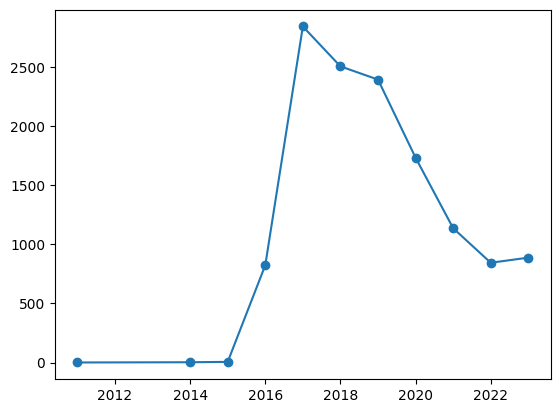

In [46]:
plt.plot(df_summ_by_year['ARRESTYEAR'], df_summ_by_year['arrest_count'], marker='o', linestyle='solid')

Text(0.5, 1.0, 'Pittsburgh Arrests by Year')

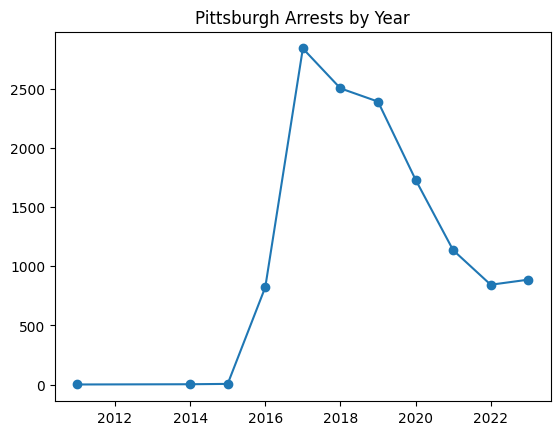

In [48]:
plt.plot(df_summ_by_year['ARRESTYEAR'], df_summ_by_year['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')

Text(0, 0.5, 'Number of Arrests')

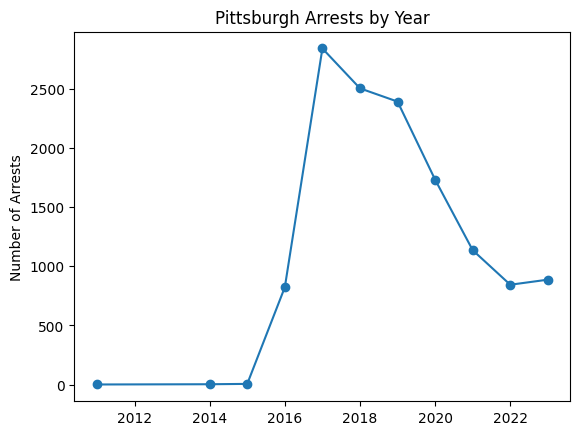

In [49]:
plt.plot(df_summ_by_year['ARRESTYEAR'], df_summ_by_year['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')

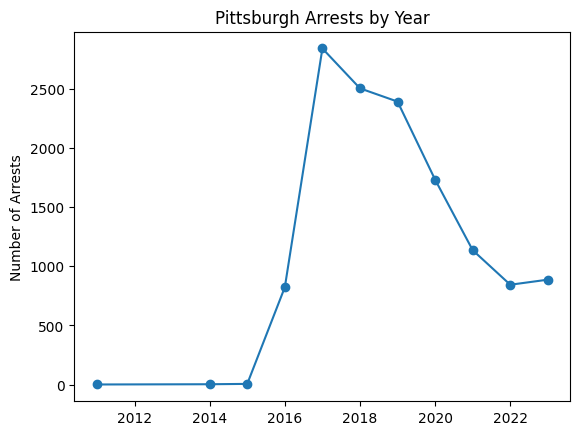

In [50]:
plt.plot(df_summ_by_year['ARRESTYEAR'], df_summ_by_year['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')
plt.show()

In [32]:
df['ARRESTMONTH'] = [str(x.month) + '/1/' + str(x.year) for x in df['ARRESTTIME']]

In [40]:
df['ARRESTMONTH'] = pd.to_datetime(df['ARRESTMONTH'] )

In [41]:
df_summ_by_month = df.groupby(['ARRESTMONTH']).\
            aggregate(arrest_count=('PK', 'count')).\
            reset_index().\
            sort_values('ARRESTMONTH').\
            copy()

In [44]:
df_summ_by_month.head(20)

,ARRESTMONTH,arrest_count
0,2011-06-01,1
1,2014-02-01,2
2,2014-11-01,1
3,2015-03-01,1
4,2015-04-01,1
5,2015-05-01,1
6,2015-09-01,2
7,2015-10-01,1
8,2016-02-01,1
9,2016-04-01,1
